In [118]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
import xgboost

%matplotlib inline

In [52]:
train = pd.read_csv('/Users/xingobar/Downloads/animal_train.csv')
test = pd.read_csv('/Users/xingobar/Downloads/animal_test.csv')
outcome = train.OutcomeType

In [6]:
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [17]:
dog_train = train[train['AnimalType'] == 'Dog']
dog_train = dog_train.reset_index()
dog_train_outcome = dog_train.OutcomeType
dog_train.drop(['index','AnimalType','OutcomeType'],axis=1,inplace=True)
dog_test = test[test['AnimalType'] == 'Dog']
dog_test = dog_test.reset_index()
dog_test.drop(['index','AnimalType'],axis=1,inplace=True)


cat_train = train[train['AnimalType'] == 'Cat']
cat_train = cat_train.reset_index()
cat_train_outcome = cat_train.OutcomeType
cat_train.drop(['index','OutcomeType','AnimalType'],axis=1,inplace=True)
cat_test = test[test['AnimalType'] =='Cat']
cat_test = cat_test.reset_index()
cat_test.drop(['index','AnimalType'],axis=1,inplace=True)

In [16]:
dog_train.head()

,AnimalID,Name,DateTime,OutcomeSubtype,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,NaN,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A686464,Pearce,2015-01-31 12:28:00,Foster,Neutered Male,2 years,Pit Bull Mix,Blue/White
2,A667013,NaN,2013-11-15 12:52:00,Partner,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
3,A677334,Elsa,2014-04-25 13:04:00,Partner,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
4,A671784,Lucy,2014-02-04 17:17:00,NaN,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White


In [14]:
test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


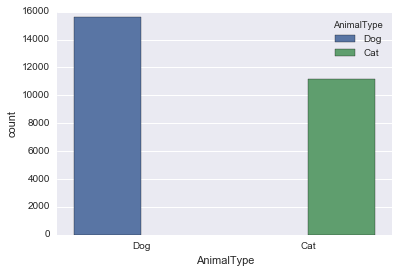

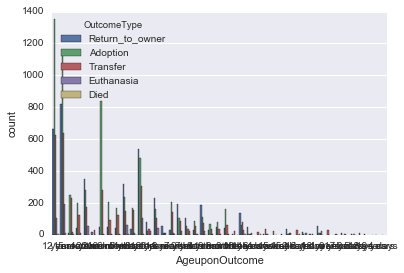

In [23]:
x = train.AnimalType
y = train.OutcomeType
sns.countplot(x,hue=x)
plt.figure(50)
sns.countplot(dog_train.AgeuponOutcome,hue=dog_train_outcome)

In [106]:
### data processing 
train.head()
#train_datetime = pd.to_datetime(train.DateTime)
#test_datetime = pd.to_datetime(test.DateTime)
#train['year'] = train_datetime.dt.year
#train['month'] = train_datetime.dt.month
#train['day'] = train_datetime.dt.day
#train['hour'] = train_datetime.dt.hour
#train['minute']= train_datetime.dt.minute
#test['year'] = test_datetime.dt.year
#test['month'] = test_datetime.dt.month
#test['hour'] = test_datetime.dt.hour
#test['day'] = test_datetime.dt.day
#train.drop(['DateTime'],axis=1,inplace=True)
#test.drop(['DateTime'],axis=1,inplace=True)


dog_train_datetime = pd.to_datetime(dog_train.DateTime)
dog_test_datetime =  pd.to_datetime(dog_test.DateTime)
cat_train_datetime = pd.to_datetime(cat_train.DateTime)
cat_test_datetime = pd.to_datetime(cat_test.DateTime)
dog_train['year'] = dog_train_datetime.dt.year
dog_train['month'] = dog_train_datetime.dt.month
dog_train['day'] = dog_train_datetime.dt.day
dog_test['year'] = dog_test_datetime.dt.year
dog_test['month'] = dog_test_datetime.dt.month
dog_test['day'] = dog_test_datetime.dt.day
cat_train['year'] = cat_train_datetime.dt.year
cat_train['month'] = cat_train_datetime.dt.month
cat_train['day'] = cat_train_datetime.dt.day
cat_test['year'] = cat_test_datetime.dt.year
cat_test['month'] = cat_test_datetime.dt.month
cat_test['day'] = cat_test_datetime.dt.day
dog_train.drop(['DateTime'],axis=1,inplace=True)
dog_test.drop(['DateTime'],axis=1,inplace=True)
cat_train.drop(['DateTime'],axis=1,inplace=True)
cat_test.drop(['DateTime'],axis=1,inplace=True)

#train['SexuponOutcome'].fillna('Spayed Female',inplace=True)
#test['SexuponOutcome'].fillna('Spaed Female',inplace=True)
dog_train['SexuponOutcome'].fillna('Spayed Female',inplace=True)
dog_test['SexuponOutcome'].fillna('Spayed Female',inplace=True)
cat_train['SexuponOutcome'].fillna('Spayed Female',inplace=True)
cat_test['SexuponOutcome'].fillna('Spayed Female',inplace=True)
def convert_sex_to_numeric(columns):
    try:
        columns = columns.split()
    except:
        return 0
    if columns[0] == 'Neutered' or columns[0] == 'Spayed':
        return 2
    elif columns[0] == 'Intact' :
        return 1
    else:
        return 0 
#train['viriginity'] = train['SexuponOutcome'].apply(convert_sex_to_numeric)
#test['viriginity'] = test['SexuponOutcome'].apply(convert_sex_to_numeric)
dog_train['viriginity'] = dog_train['SexuponOutcome'].apply(convert_sex_to_numeric)
dog_test['viriginity'] = dog_test['SexuponOutcome'].apply(convert_sex_to_numeric)
cat_train['viriginity'] = cat_train['SexuponOutcome'].apply(convert_sex_to_numeric)
cat_test['viriginity'] = cat_test['SexuponOutcome'].apply(convert_sex_to_numeric)



In [54]:
train.head()

,AnimalID,Name,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,year,month,day,hour,minute,viriginity
0,A671945,Hambone,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,2014,2,12,18,22,2
1,A656520,Emily,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,2013,10,13,12,44,2
2,A686464,Pearce,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,2015,1,31,12,28,2
3,A683430,NaN,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,2014,7,11,19,9,1
4,A667013,NaN,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,2013,11,15,12,52,2


In [107]:
## process age
#train['AgeuponOutcome'].fillna('1 month',inplace=True)
#test['AgeuponOutcome'].fillna('1 month',inplace=True)

dog_train['AgeuponOutcome'].fillna('1 month',inplace=True)
dog_test['AgeuponOutcome'].fillna('1 month',inplace=True)
cat_train['AgeuponOutcome'].fillna('1 month',inplace=True)
cat_test['AgeuponOutcome'].fillna('1 month',inplace=True)

def process_age(age):
    Age_list = age.split()
    Age = int(Age_list[0])
    if(Age_list[1].find('s')):
        Age_list[1] = Age_list[1].replace('s','')
    if Age_list[1] == 'year':
        return Age*365
    elif Age_list[1] =='weeks':
        return Age*7
    elif Age_list[1] == 'months':
        return Age*30
    else:
        return Age
#train['AgeuponOutcome'] = train['AgeuponOutcome'].apply(process_age)
#test['AgeuponOutcome'] = test['AgeuponOutcome'].apply(process_age)
dog_train['AgeuponOutcome'] = dog_train['AgeuponOutcome'].apply(process_age)
dog_test['AgeuponOutcome'] = dog_test['AgeuponOutcome'].apply(process_age)
cat_train['AgeuponOutcome']=cat_train['AgeuponOutcome'].apply(process_age)
cat_test['AgeuponOutcome'] =cat_test['AgeuponOutcome'].apply(process_age)

In [112]:
## process name
def check_has_name(name):
    if type(name) is str:
        return 1
    else:
        return 0

dog_train['has_name']=dog_train['Name'].apply(check_has_name)
dog_test['has_name']=dog_test['Name'].apply(check_has_name)
cat_train['has_name']=cat_train['Name'].apply(check_has_name)
cat_test['has_name']=cat_test['Name'].apply(check_has_name)
dog_train.drop(['Name'],axis=1,inplace=True)
dog_test.drop(['Name'],axis=1,inplace=True)
cat_train.drop(['Name'],axis=1,inplace=True)
cat_test.drop(['Name'],axis=1,inplace=True)
#train['has_name'] = train['Name'].apply(check_has_name)
#test['has_name'] = test['Name'].apply(check_has_name)
#train.drop(['Name'],axis=1,inplace=True)
#test.drop(['Name'],axis=1,inplace=True)

In [59]:
train.apply(lambda x:sum(x.isnull()))

AnimalID              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        0
AgeuponOutcome        0
Breed                 0
Color                 0
year                  0
month                 0
day                   0
hour                  0
minute                0
viriginity            0
has_name              0
dtype: int64

In [109]:
## process hair 
def process_hair(data):
    if data in 'Longhair':
        return 1
    elif data in 'Shorthair':
        return 0
    else:
        return 2

dog_train['hair_group']=dog_train['Breed'].apply(process_hair)
dog_test['hair_group']=dog_test['Breed'].apply(process_hair)
cat_train['hair_group']=cat_train['Breed'].apply(process_hair)
cat_test['hair_group']=cat_test['Breed'].apply(process_hair)
#train['hair_group'] = train['Breed'].apply(process_hair)
#test['hair_group'] = test['Breed'].apply(process_hair)

In [74]:
train.head()

,AnimalID,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,year,month,day,hour,minute,viriginity,has_name,hair_group
0,A671945,Return_to_owner,NaN,Dog,Neutered Male,365,Shetland Sheepdog Mix,106.0,2014,2,12,18,22,2,1,2
1,A656520,Euthanasia,Suffering,Cat,Spayed Female,365,Domestic Shorthair Mix,15.0,2013,10,13,12,44,2,1,2
2,A686464,Adoption,Foster,Dog,Neutered Male,730,Pit Bull Mix,29.0,2015,1,31,12,28,2,1,2
3,A683430,Transfer,Partner,Cat,Intact Male,3,Domestic Shorthair Mix,143.0,2014,7,11,19,9,1,0,2
4,A667013,Transfer,Partner,Dog,Neutered Male,730,Lhasa Apso/Miniature Poodle,150.0,2013,11,15,12,52,2,0,2


In [110]:
## process color
def process_color(data):
    try:
        color = data.split()
    except:
        return 'unknown'
    return str(color[0])
#train['Color'] = train['Color'].apply(process_color)
#test['Color'] = test['Color'].apply(process_color)
#intval,label = pd.factorize(train['Color'],sort=True)  # convert labels to integer
#train['Color'] = pd.DataFrame(intval)
#intval,label = pd.factorize(test['Color'],sort=True)  # convert labels to integer
#train['Color'] = pd.DataFrame(intval)
dog_train['Color'] = dog_train['Color'].apply(process_color)
intval,label = pd.factorize(dog_train['Color'],sort=True)
dog_train['Color'] = pd.DataFrame(intval)
dog_test['Color']=dog_test['Color'].apply(process_color)
intval,label = pd.factorize(dog_test['Color'],sort=True)
dog_test['Color'] = pd.DataFrame(intval)

cat_train['Color'] = cat_train['Color'].apply(process_color)
intval,label = pd.factorize(cat_train['Color'],sort=True)
cat_train['Color'] = pd.DataFrame(intval)

cat_test['Color'] = cat_test['Color'].apply(process_color)
intval,label = pd.factorize(cat_test['Color'],sort=True)
cat_test['Color'] = pd.DataFrame(intval)





In [72]:
train.head()

,AnimalID,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,year,month,day,hour,minute,viriginity,has_name,hair_group
0,A671945,Return_to_owner,NaN,Dog,Neutered Male,365,Shetland Sheepdog Mix,106.0,2014,2,12,18,22,2,1,0
1,A656520,Euthanasia,Suffering,Cat,Spayed Female,365,Domestic Shorthair Mix,15.0,2013,10,13,12,44,2,1,0
2,A686464,Adoption,Foster,Dog,Neutered Male,730,Pit Bull Mix,29.0,2015,1,31,12,28,2,1,0
3,A683430,Transfer,Partner,Cat,Intact Male,3,Domestic Shorthair Mix,143.0,2014,7,11,19,9,1,0,0
4,A667013,Transfer,Partner,Dog,Neutered Male,730,Lhasa Apso/Miniature Poodle,150.0,2013,11,15,12,52,2,0,0


In [86]:
def aggressive(breed):
    if breed.find("Pit Bull") != -1:
        return 1
    elif breed.find("Rottweiler") != -1:
        return 2#1
    elif breed.find("Husky") != -1:
        return 3#1
    elif breed.find("Shepherd") != -1:
        return 4#1
    elif breed.find("Malamute") != -1:
        return 5#1
    elif breed.find("Doberman") != -1:
        return 6#1
    elif breed.find("Chow") != -1:
        return 7#1
    elif breed.find("Dane") != -1:
        return 8#1
    elif breed.find("Boxer") != -1:
        return 9#1
    elif breed.find("Akita") != -1:
        return 10#1
    else:
        return 11#2
dog_train['aggressive'] = dog_train['Breed'].apply(aggressive)
dog_test['aggressive'] = dog_test['Breed'].apply(aggressive)

In [90]:
def allergic(breed):
    if breed.find("Akita") != -1:
        return 1
    elif breed.find("Malamute") != -1:
        return 2#1
    elif breed.find("Eskimo") != -1:
        return 3#1
    elif breed.find("Corgi") != -1:
        return 4#1
    elif breed.find("Chow") != -1:
        return 5#1
    elif breed.find("Shepherd") != -1:
        return 6#1
    elif breed.find("Pyrenees") != -1:
        return 7#1
    elif breed.find("Labrador") != -1:
        return 8#1
    elif breed.find("Retriever") != -1:
        return 9#1
    elif breed.find("Husky") != -1:
        return 10#1
    else:
        return 11#2
dog_train['Allergic'] = dog_train['Breed'].apply(allergic)
dog_test['Allergic'] = dog_test['Breed'].apply(allergic)

In [93]:
# below 100 pounds
# above 100 pounds
def weight(breed):
    if breed.find("Pit Bull") != -1:
        return 1
    elif breed.find("Husky") != -1:
        return 1
    elif breed.find("Doberman") != -1:
        return 1
    elif breed.find("Boxer") != -1:
        return 1
    elif breed.find("Akita") != -1:
        return 1
    elif breed.find("Chow") != -1:
        return 1
    elif breed.find("Rottweiler") != -1:
        return 2
    elif breed.find("Shepherd") != -1:
        return 2
    elif breed.find("Malamute") != -1:
        return 2
    elif breed.find("Dane") != -1:
        return 2
    else:
        return 3
dog_train['Weight'] = dog_train['Breed'].apply(weight)
dog_test['Weight'] = dog_test['Breed'].apply(weight)

In [94]:
dog_train.head()

,AnimalID,Name,DateTime,OutcomeSubtype,SexuponOutcome,AgeuponOutcome,Breed,Color,aggressive,Allergic,Weight
0,A671945,Hambone,2014-02-12 18:22:00,NaN,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,11,11,3
1,A686464,Pearce,2015-01-31 12:28:00,Foster,Neutered Male,2 years,Pit Bull Mix,Blue/White,1,11,1
2,A667013,NaN,2013-11-15 12:52:00,Partner,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,11,11,3
3,A677334,Elsa,2014-04-25 13:04:00,Partner,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan,11,11,3
4,A671784,Lucy,2014-02-04 17:17:00,NaN,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White,1,11,1


In [115]:
### process breed
def process_breed(breed):
    if (' ' in breed) == False:  # one word
        br = breed
    else:
        br = breed.split()
        try:
            br = br[2]  # mix 
        except:
            br = br[1]  # breed
    if br == 'Mix':
        return 0
    else:
        return 1
#train['Breed'] = train['Breed'].apply(process_breed)
#test['Breed'] = test['Breed'].apply(process_breed)
dog_train['Breed'] = dog_train['Breed'].apply(process_breed)
dog_test['Breed'] = dog_test['Breed'].apply(process_breed)
cat_train['Breed'] = cat_train['Breed'].apply(process_breed)
cat_test['Breed']=cat_test['Breed'].apply(process_breed)

In [134]:
## proces sex
def process_sex(data):
    try:
        sex = data.split()
    except:
        return 0
    if sex[0] == 'Unknown':
        return 0
    elif sex[1] =='Male':
        return 1
    elif sex[1] == 'Female':
        return 2
    else: 
        return 0
dog_train['Sex'] = dog_train['SexuponOutcome'].apply(process_sex)
dog_test['Sex'] = dog_test['SexuponOutcome'].apply(process_sex)
cat_train['Sex'] = cat_train['SexuponOutcome'].apply(process_sex)
cat_test['Sex']=cat_test['SexuponOutcome'].apply(process_sex)

dog_train.drop(['SexuponOutcome'],axis=1,inplace=True)
dog_test.drop(['SexuponOutcome'],axis=1,inplace=True)
cat_train.drop(['SexuponOutcome'],axis=1,inplace=True)
cat_test.drop(['SexuponOutcome'],axis=1,inplace=True)

KeyError: 'SexuponOutcome'

In [135]:
cat_train.head()

,AnimalID,OutcomeSubtype,AgeuponOutcome,Breed,Color,year,month,day,viriginity,has_name,hair_group,Sex
0,A656520,Suffering,365,0,31,2013,10,13,2,1,2,2
1,A683430,Partner,3,0,10,2014,7,11,1,0,2,1
2,A699218,Partner,3,0,10,2015,3,28,1,1,2,1
3,A701489,Partner,3,0,16,2015,4,30,0,0,2,0
4,A668402,SCRP,730,0,2,2013,12,5,0,0,2,0


In [116]:
dog_train.head()

,AnimalID,OutcomeSubtype,SexuponOutcome,AgeuponOutcome,Breed,Color,aggressive,Allergic,Weight,year,month,day,viriginity,has_name,hair_group
0,A671945,NaN,Neutered Male,365,0,36,11,11,3,2014,2,12,2,1,2
1,A686464,Foster,Neutered Male,730,0,22,1,11,1,2015,1,31,2,1,2
2,A667013,Partner,Neutered Male,730,1,119,11,11,3,2013,11,15,2,0,2
3,A677334,Partner,Intact Female,1,1,13,11,11,3,2014,4,25,1,1,2
4,A671784,NaN,Spayed Female,5,1,102,1,11,1,2014,2,4,2,1,2


In [143]:
dog_train.drop(['OutcomeSubtype'],axis=1,inplace=True)
#dog_test.drop(['OutcomeSubtype'],axis=1,inplace=True)
cat_train.drop(['OutcomeSubtype'],axis=1,inplace=True)
dog_train.drop(['AnimalID'],axis=1,inplace=True)
cat_train.drop(['AnimalID'],axis=1,inplace=True)
#cat_test.drop(['OutcomeSubtype'],axis=1,inplace=True)
dog_X_train,d_X_val,dog_y_train,dog_y_val = train_test_split(dog_train,dog_train_outcome,test_size=.3,random_state=42)
cat_X_train,cat_X_val,cat_y_train,cat_y_val = train_test_split(cat_train,cat_train_outcome,test_size=.3,random_state=42)

In [147]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score,log_loss
clf = RandomForestClassifier(n_estimators=500,max_depth=5)
#clf = GradientBoostingClassifier()
print '======== Dog ============='
clf.fit(dog_X_train,dog_y_train.values)
y_pred = clf.predict(d_X_val)
y_pred_proba = clf.predict_proba(d_X_val)
print 'Accuracy : ',accuracy_score(dog_y_val,y_pred)
print 'Log Loss : ',log_loss(dog_y_val,y_pred_proba)

print '==========================='
print 
print '======= Cat =============='
clf.fit(cat_X_train,cat_y_train.values)
y_pred = clf.predict(cat_X_val)
y_pred_proba = clf.predict_proba(cat_X_val)
print 'Accuracy : ',accuracy_score(cat_y_val,y_pred)
print 'Log Loss : ',log_loss(cat_y_val,y_pred_proba)



======== Dog =============
Accuracy :  0.562940799316
Log Loss :  1.03296912715

======= Cat ==============
Accuracy :  0.75576174798
Log Loss :  0.678844548361


In [160]:
#keep ID
#dog_ID = np.array([dog_test.ID]).T
#dog_test.drop("ID", axis=1, inplace=True)

#cat_ID = np.array([cat_test.ID]).T
#cat_test.drop("ID", axis=1, inplace=True)
dog_clf = RandomForestClassifier(n_estimators=500,max_depth=5)
dog_clf.fit(dog_train,dog_train_outcome)
print dog_clf.classes_
dog_y_pred = dog_clf.predict_proba(dog_test)
dog_test_result = np.append(dog_ID,dog_y_pred,axis=1)
cat_clf = RandomForestClassifier(n_estimators=500,max_depth=5)
cat_clf.fit(cat_train,cat_train_outcome)
cat_y_pred = cat_clf.predict_proba(cat_test)
cat_test_result = np.append(cat_ID,cat_y_pred,axis=1)

['Adoption' 'Died' 'Euthanasia' 'Return_to_owner' 'Transfer']


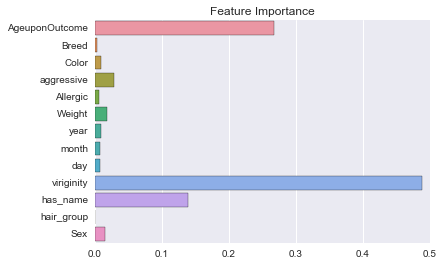

In [162]:
plt.figure(0)
plt.title("Feature Importance")
sns.barplot(y=dog_train.columns, x=dog_clf.feature_importances_)

In [ ]:
# #keep ID
#dog_test_ID = dog_test["ID"].as_matrix()
#dog_test_ID = np.array([dog_test_ID])
#dog_test_ID = dog_test_ID.T
#dog_test.drop("ID", axis=1, inplace=True)
#cat_test_ID = cat_test["ID"].as_matrix()
#cat_test_ID = np.array([cat_test_ID])
#cat_test_ID = cat_test_ID.T
#cat_test.drop("ID", axis=1, inplace=True)

In [174]:
y_probs = np.append(dog_test_result, cat_test_result, axis=0)
y_probs = y_probs[y_probs[:,0].argsort()] ## 按升序排列
y_probs = y_probs[:,1:]
print(y_probs)

results = pd.read_csv("/Users/xingobar/Downloads/sample_submission.csv")

#each result has their corresponding probabilistic value
results["Adoption"] = y_probs[:,0]
results["Died"] = y_probs[:,1]
results["Euthanasia"] = y_probs[:,2]
results["Return_to_owner"] = y_probs[:,3]
results["Transfer"] = y_probs[:,4]

results.to_csv("animal_outcome.csv",index = False)

[[ 0.175405    0.00617771  0.06742818  0.26428777  0.48670133]
 [ 0.43690858  0.0018788   0.07013771  0.32701944  0.16405546]
 [ 0.55164681  0.0051748   0.02812141  0.12567757  0.28937942]
 ..., 
 [ 0.02572218  0.01668911  0.09883975  0.00574681  0.85300215]
 [ 0.38476301  0.00213     0.04426033  0.40618261  0.16266406]
 [ 0.13731147  0.00484336  0.11176212  0.36749098  0.37859208]]


In [171]:
dog_test_result.shape

(6656, 6)

In [172]:
cat_test_result.shape

(4800, 6)

In [173]:
y_probs.shape

(11456, 6)